In [1]:
import scanpy as sc
import tcri
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding
import grimoire as spell
import os

In [2]:
adata = sc.read("/Users/ceglian/data/tcri/smith.h5ad")
adata

AnnData object with n_obs × n_vars = 59099 × 15729
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'entropy-BCT8.3

In [3]:
#any without signed mi were  false
signed_mi          = True
init_ortho         = True
entropy_threshold  = 1.
mutual_information = "/Users/ceglian/Data/tcri/zhang_{}_{}.p".format(signed_mi,str(entropy_threshold).replace(".",""))
print(mutual_information)
embedding_size     = 100
alpha              = 0.08
beta               = 0.02
gain               = 10
vector_file        = "/Users/ceglian/Data/tcri/zhang_{}_{}_{}_{}_{}_{}.vec".format(embedding_size, alpha, beta, gain, signed_mi, init_ortho)
print(vector_file)
retrain            = False
annotated_h5ad     = "/Users/ceglian/Data/tcri/zhang_annoated.h5ad"
device             = "cpu"

/Users/ceglian/Data/tcri/zhang_True_10.p
/Users/ceglian/Data/tcri/zhang_100_0.08_0.02_10_True_True.vec


In [4]:

adata = spell.pp.remove_meaningless_genes(adata)

In [5]:
trb = []
for x in adata.obs["CTnt"]:
    trb.append(x.split("_")[0])
adata.obs["trb"] = trb

In [6]:
print(adata)
adata = adata[adata.obs["trb"]!=""]
adata = adata[adata.obs["trb"]!="nan"]
adata = adata[adata.obs["trb"]!="Other"]
adata

AnnData object with n_obs × n_vars = 59099 × 15390
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'entropy

View of AnnData object with n_obs × n_vars = 59099 × 15390
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 

In [7]:
tcri.pp.gene_entropy(adata)
adata = adata[:,adata.var["entropy"] > entropy_threshold]
adata

100%|██████████| 15390/15390 [00:25<00:00, 613.04it/s]


View of AnnData object with n_obs × n_vars = 59099 × 585
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'e

In [8]:
tcri.pp.register_clonotype_key(adata,"trb")

In [9]:
if not retrain:
    load_exp = False
dataset = GeneVectorDataset(adata,load_expression=load_exp,signed_mi=signed_mi,device=device)

Running...
Skipping expression load.


In [11]:
# import pickle
# if os.path.exists(vector_file):
#     retrain = False
#     print("found previous model.")
# if retrain:
#     if os.path.exists(mutual_information):
#         dataset.mi_scores = pickle.load(open(mutual_information,"rb"))
#     cmps = GeneVector(dataset,
#                         output_file=vector_file,
#                         emb_dimension=embedding_size,
#                         gain=gain,
#                         init_ortho=init_ortho,
#                         device=device)
# if not os.path.exists(mutual_information):
#     pickle.dump(dict(dataset.mi_scores),open(mutual_information,"wb"))

found previous model.


In [11]:
# if retrain:
#     cmps.train(100000,threshold=1e-5,alpha=alpha, beta=beta, update_interval=100)
#     embed = GeneEmbedding(vector_file, dataset, vector="average")
#     cmps.plot()

In [10]:
embed = GeneEmbedding(vector_file, dataset, vector="average")
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()
adata

Loading average of 1st and 2nd weights.


100%|██████████| 17602077/17602077 [00:13<00:00, 1307985.52it/s]


Generating Cell Vectors.


100%|██████████| 59099/59099 [00:06<00:00, 9242.95it/s] 


Found 0 Cells with No Counts.
Finished.
Loading embedding in X_genevector.
Running Scanpy neighbors and umap.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


AnnData object with n_obs × n_vars = 59099 × 585
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'entropy-B

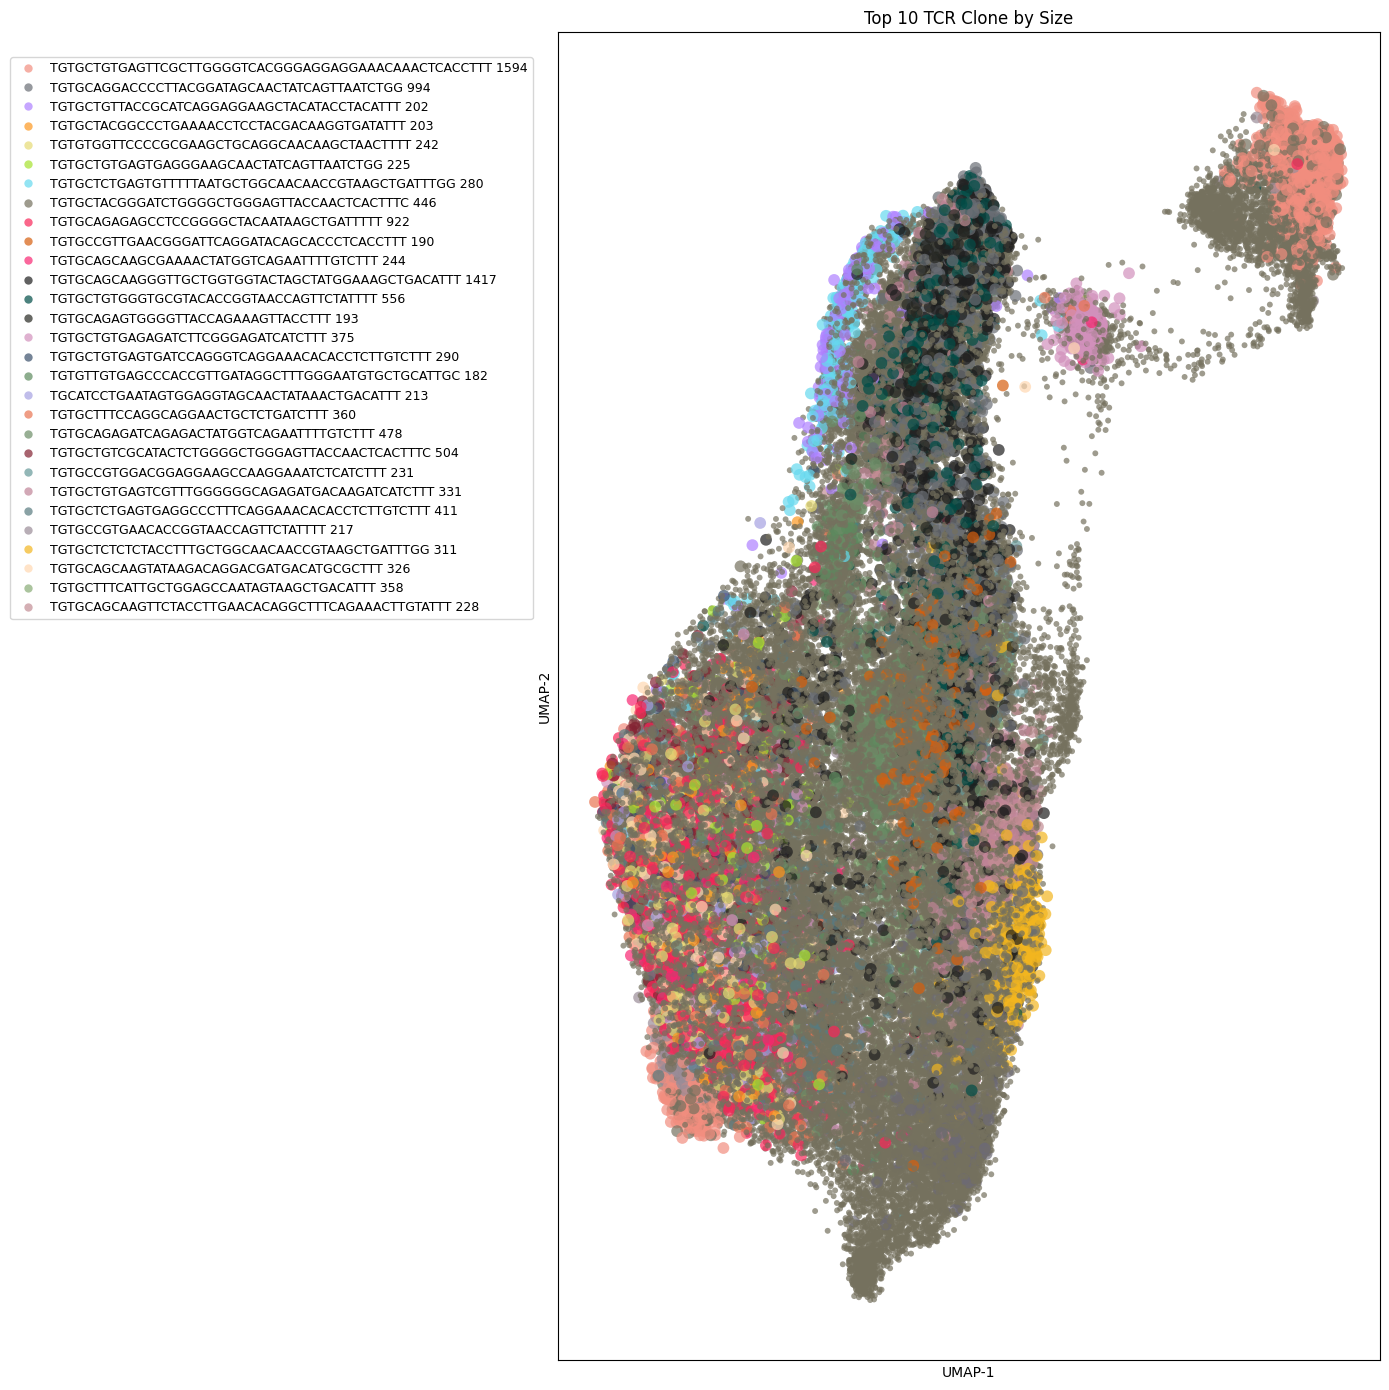

In [12]:
tcri.pl.top_clone_umap(adata,top_n=30,size=5,figsize=(14,14))

In [13]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [14]:
markers = dict()
markers["Naive"] = ["IL7R"]
markers["Memory"] = ["GZMK"]
markers["Activated"] = ["GZMB"]
markers["Dysfunctional"] = ["CXCL13"]
adata, dist = cembed.phenotype_probability(adata, markers, method="normalized_exponential", return_distances=True)

Using Normalized Exponential (Temp: 0.05)
Computing similarities for Naive
Markers: IL7R


100%|██████████| 59099/59099 [00:00<00:00, 77363.72it/s]


Computing similarities for Memory
Markers: GZMK


100%|██████████| 59099/59099 [00:00<00:00, 75951.01it/s]


Computing similarities for Activated
Markers: GZMB


100%|██████████| 59099/59099 [00:00<00:00, 75822.76it/s]


Computing similarities for Dysfunctional
Markers: CXCL13


100%|██████████| 59099/59099 [00:00<00:00, 75244.34it/s]


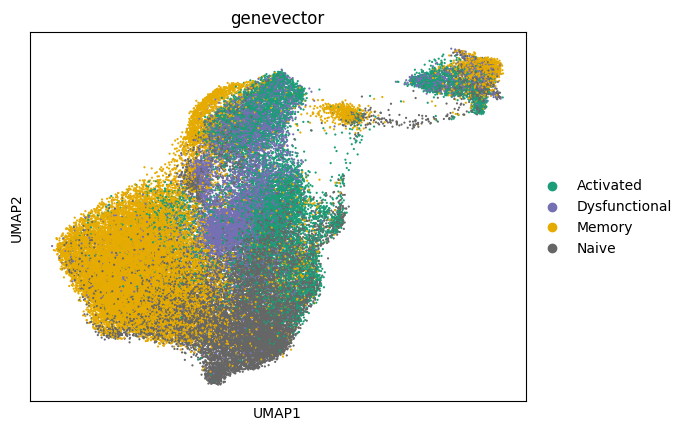

In [15]:
sc.pl.umap(adata,color="genevector",s=10,palette="Dark2")

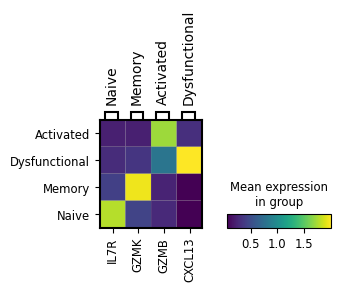

In [16]:
sc.pl.matrixplot(adata,markers,groupby="genevector")

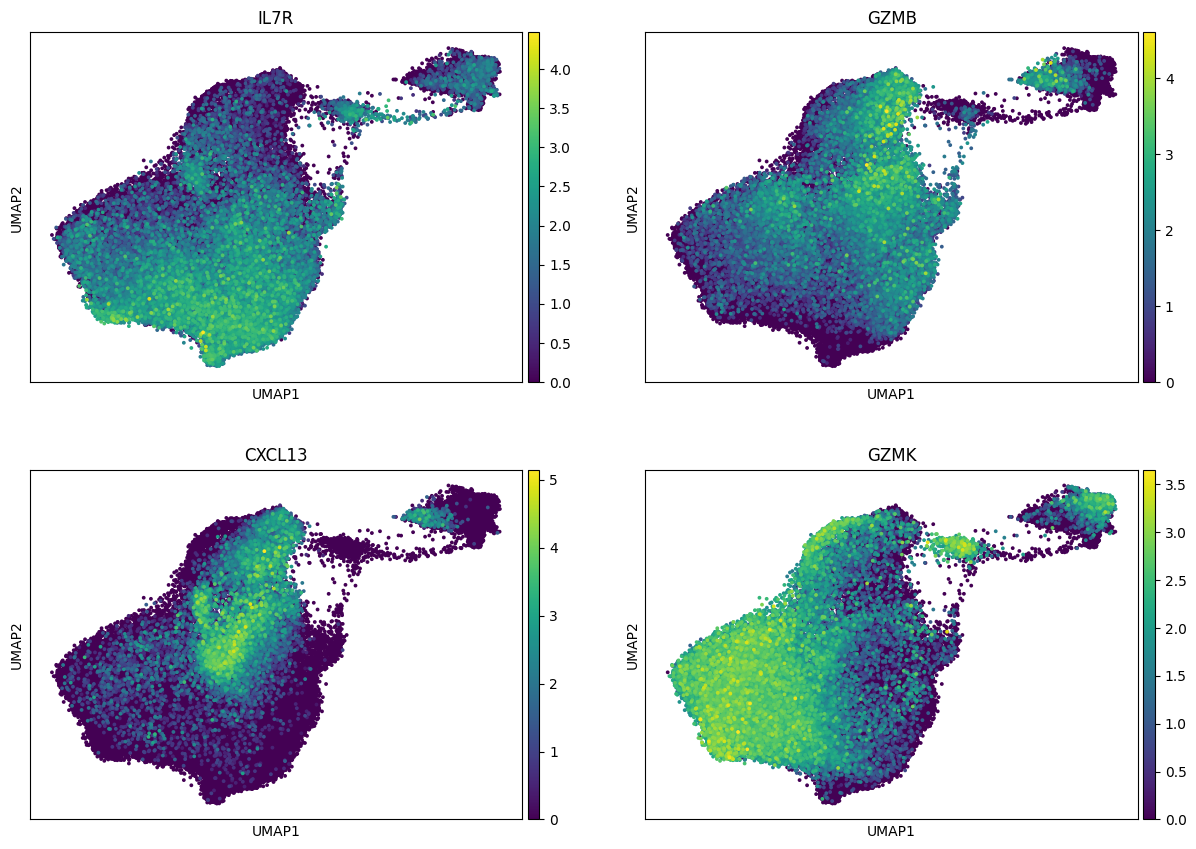

In [17]:
sc.pl.umap(adata,color=["IL7R","GZMB","CXCL13","GZMK"],ncols=2,s=30)

In [ ]:
sc.pl.umap(adata,color=["IL7R","GZMB","CXCL13","GZMK"],ncols=2,s=30)

100%|██████████| 59099/59099 [00:00<00:00, 71342.61it/s]


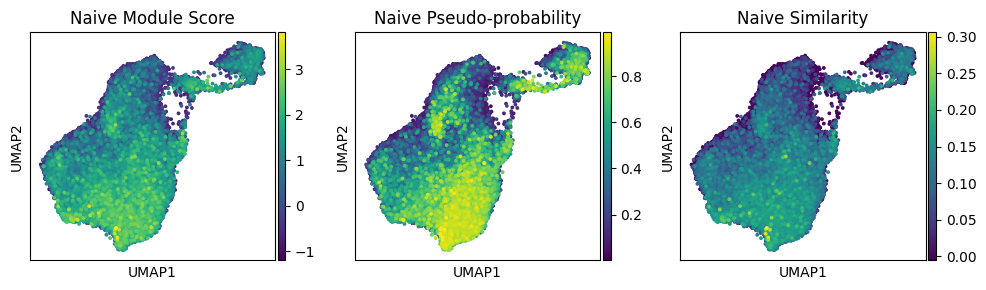

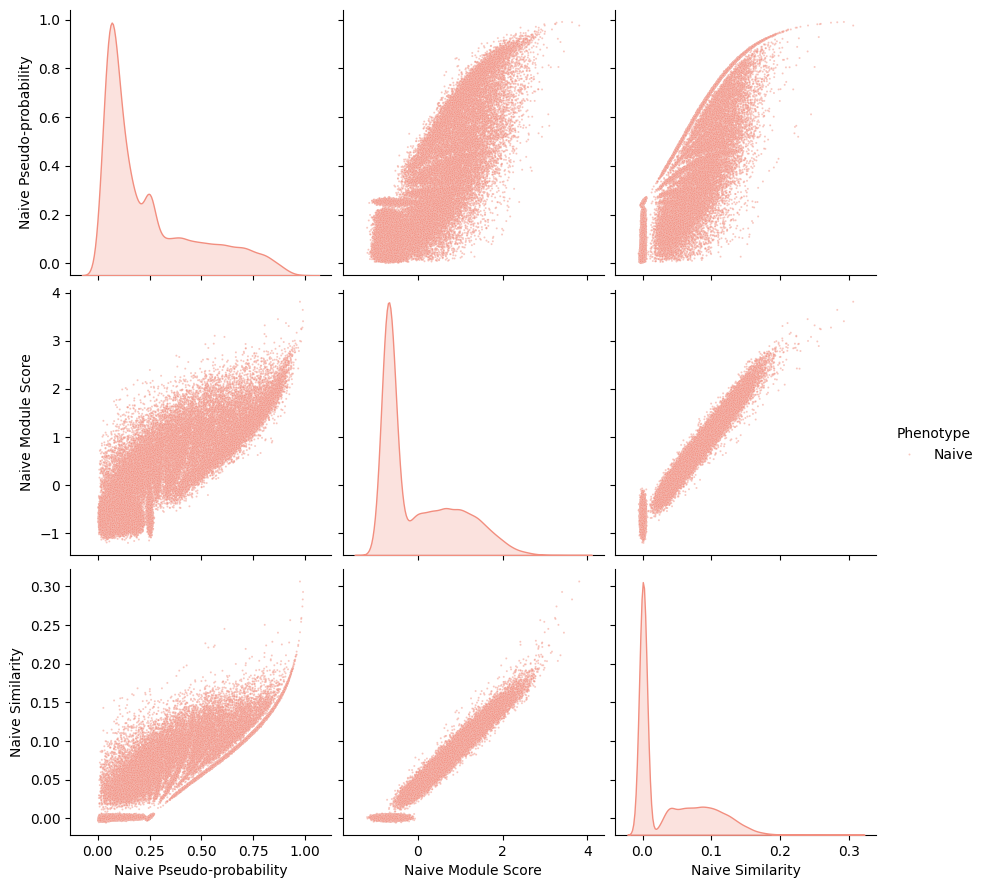

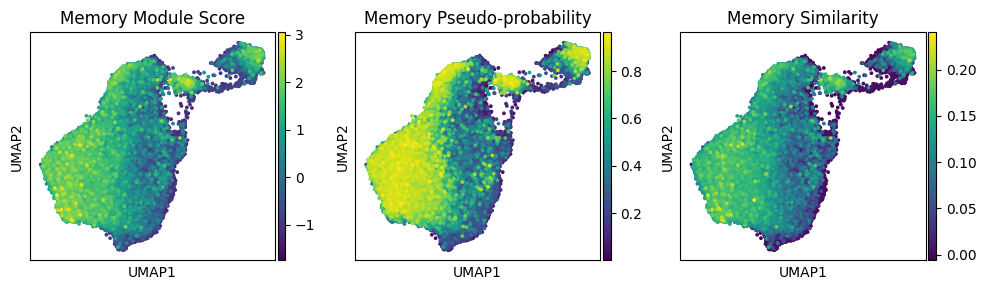

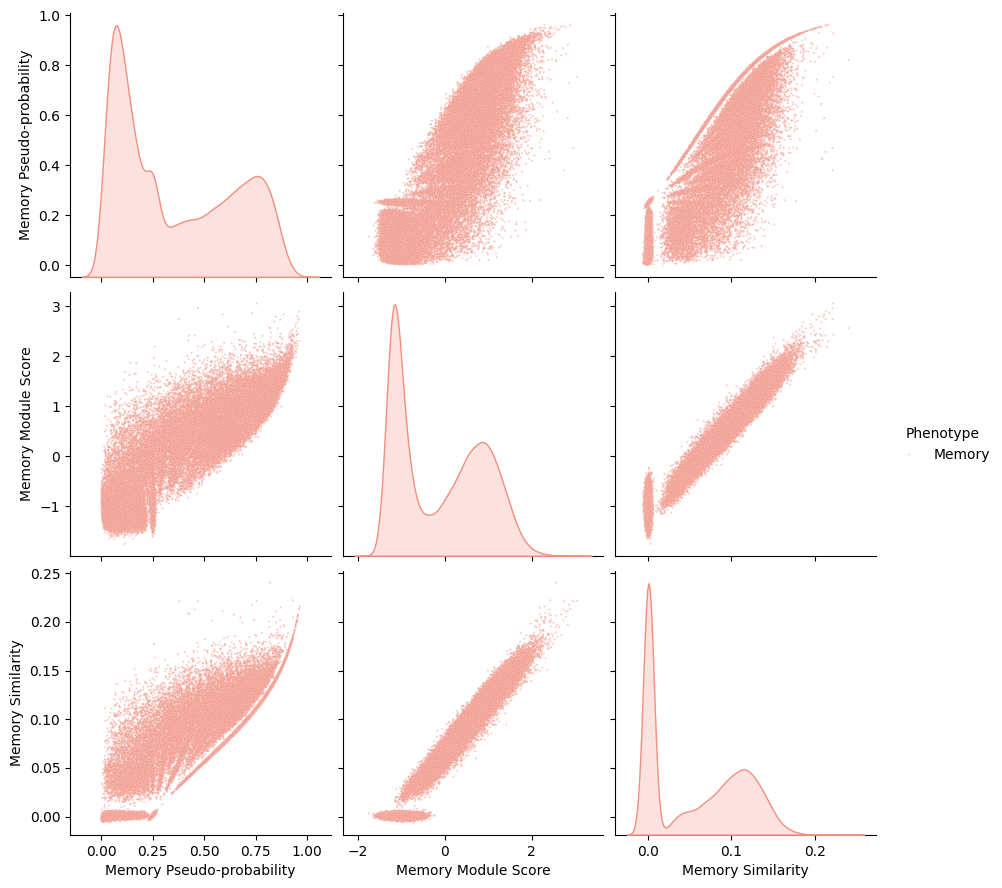

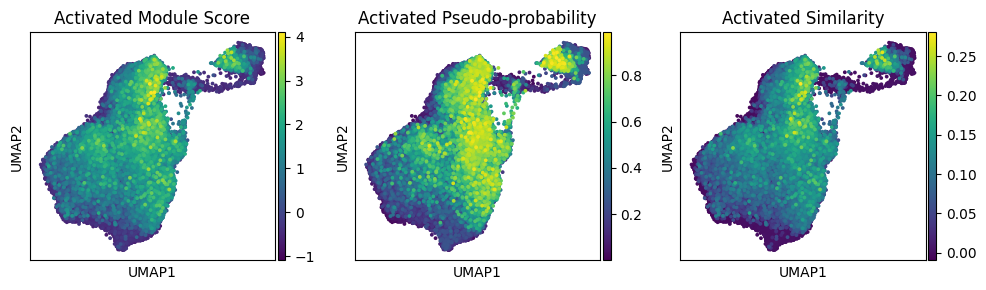

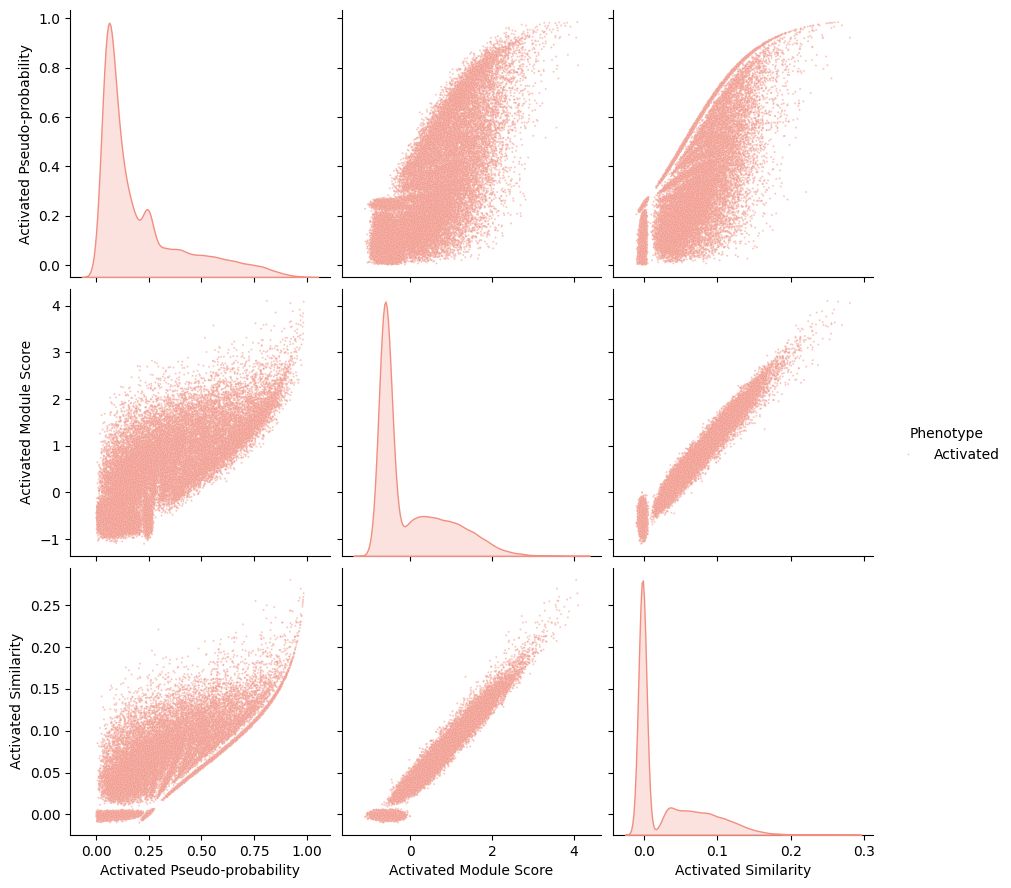

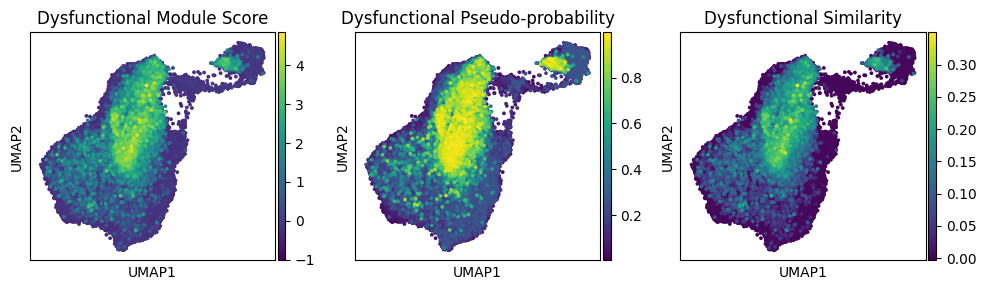

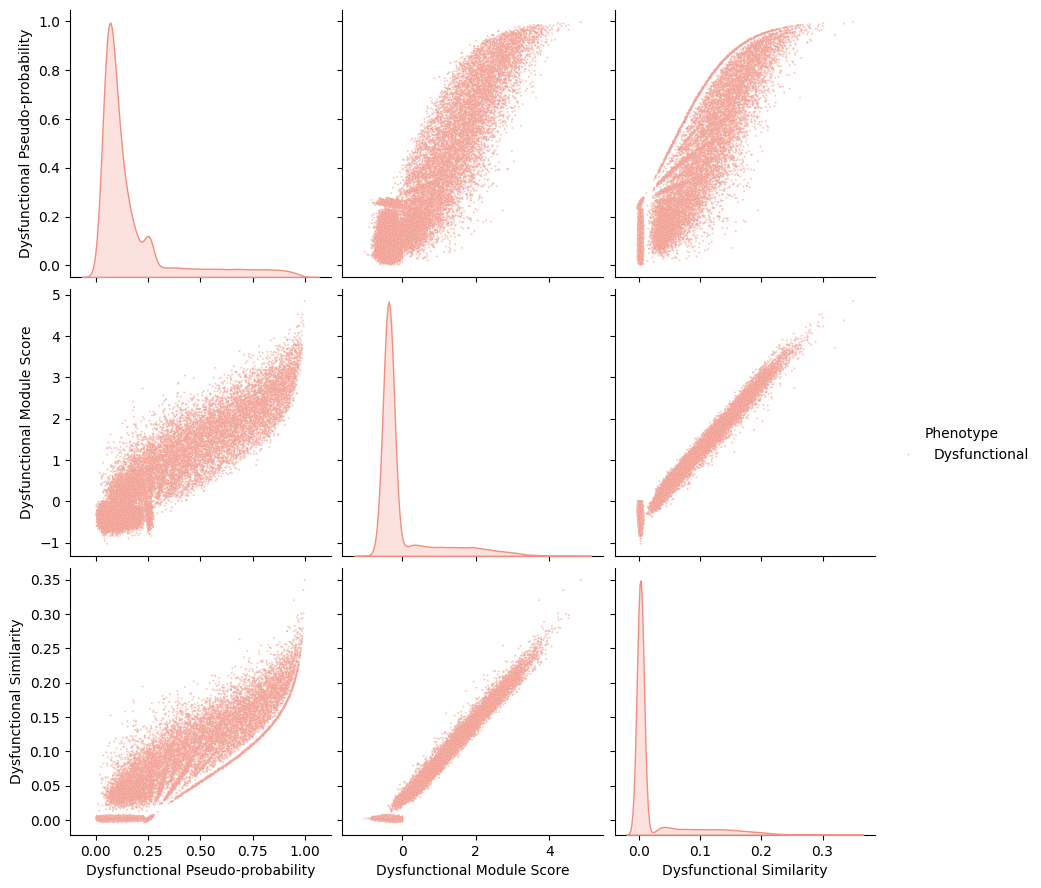

In [20]:
for phenotype, genes  in markers.items():
    cembed.phenotype_qc(adata,phenotype,genes)

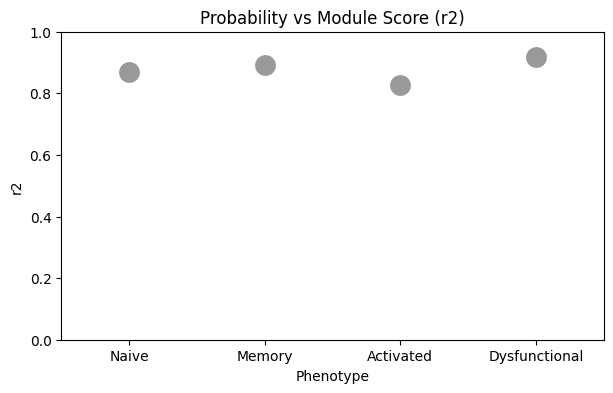

In [21]:
cembed.module_score_r2(adata,markers)

         Falling back to preprocessing with `sc.pp.pca` and default params.


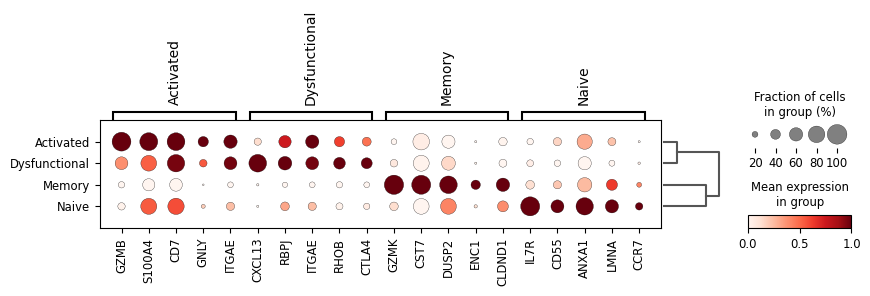

In [22]:
sc.tl.rank_genes_groups(adata,"genevector")
sc.tl.dendrogram(adata,"genevector")
sc.pl.rank_genes_groups_dotplot(adata,min_logfoldchange=1.,standard_scale='var',n_genes=5)

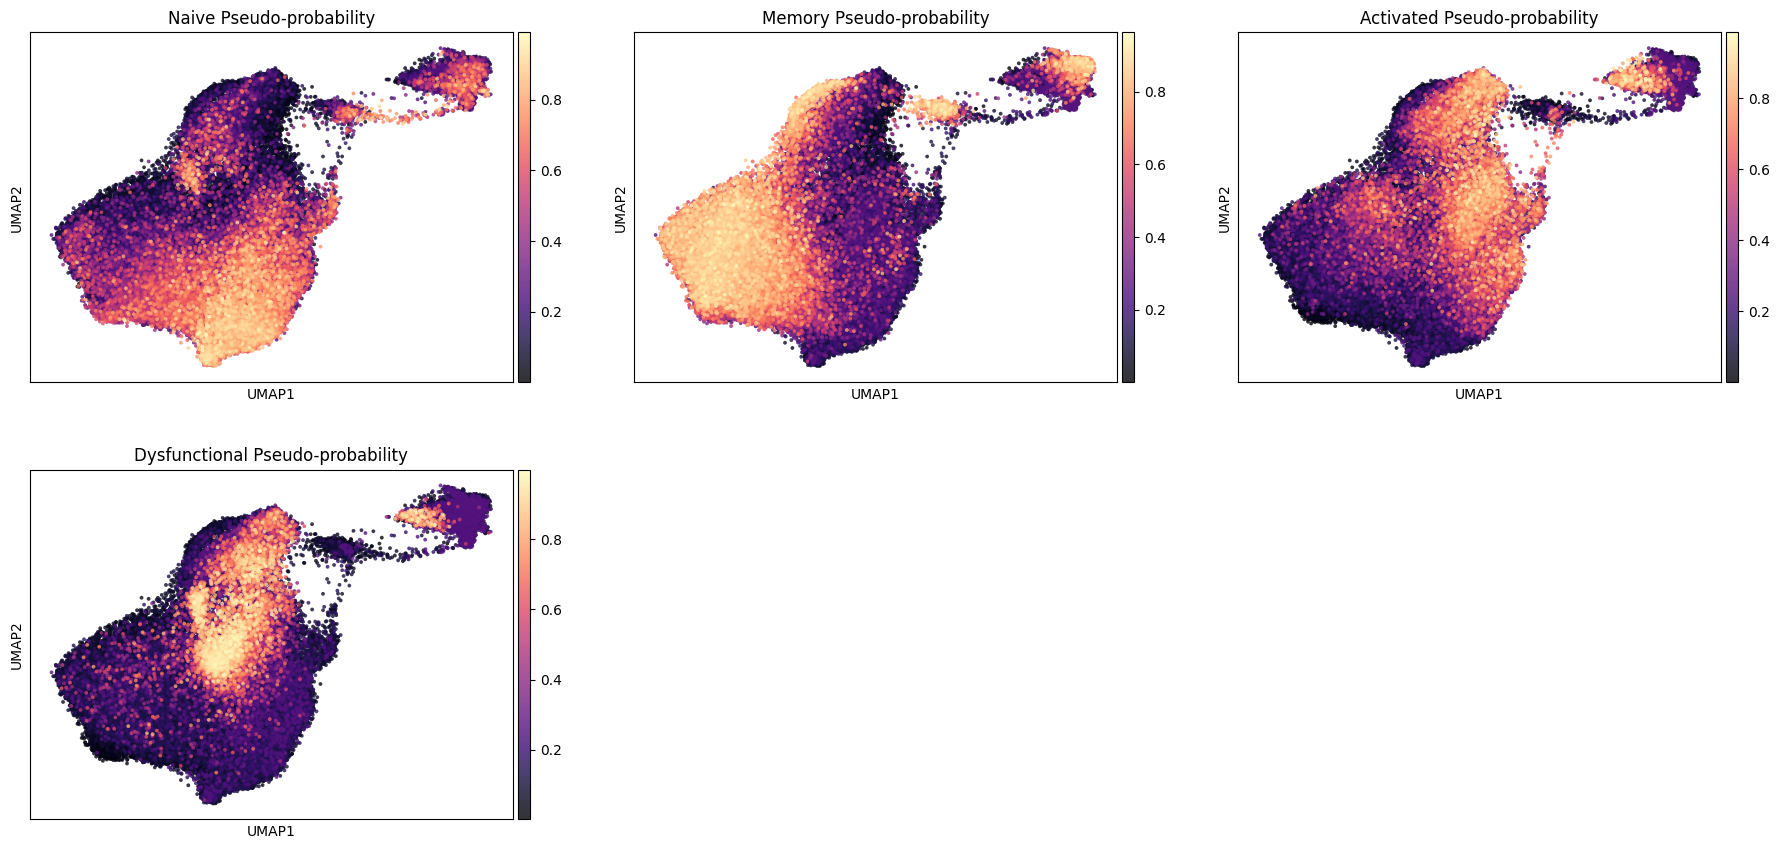

In [23]:

cembed.plot_probabilities(adata)

In [24]:
tcri.pp.clone_size(adata)

In [25]:
tcri.pp.register_phenotype_key(adata,"genevector")

<Axes: title={'center': 'Clonality'}, xlabel='Phenotype', ylabel='Clonality'>

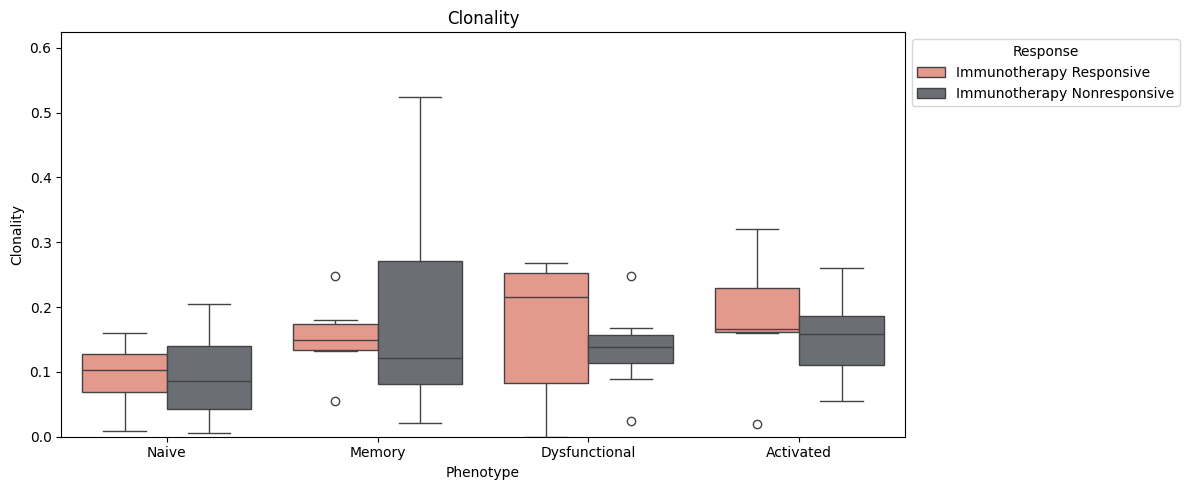

In [26]:
tcri.pl.clonality(adata,groupby="Sample",splitby="Response")

<Axes: title={'center': 'Clonotypic Entropy'}, xlabel='Phenotype', ylabel='Clonotypic Entropy'>

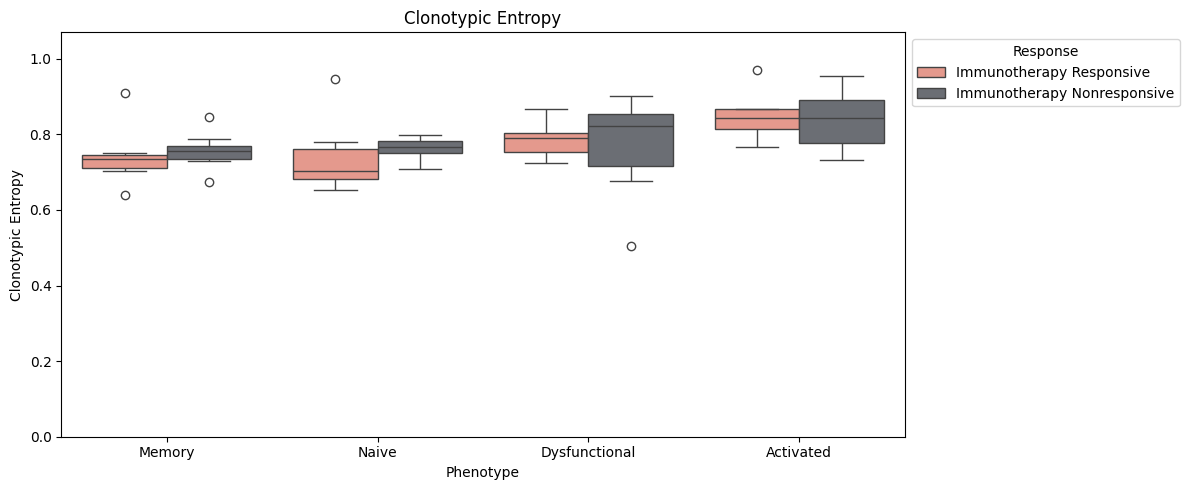

In [29]:
tcri.pl.clonotypic_entropies(adata,groupby="Sample",splitby="Response",method="probabilistic")

In [27]:
tcri.pl.clonotypic_entropy(adata,groupby="patient")

TypeError: clonotypic_entropy() missing 1 required positional argument: 'splitby'

In [126]:
adata.obs["Cohort"]

LB14.14_AAAGATGTCTGGAGCC-1-LB14.14    GSE176021
LB14.14_AAAGTAGGTCTCCACT-1-LB14.14    GSE176021
LB14.14_AACCATGGTTCCATGA-1-LB14.14    GSE176021
LB14.14_AACCGCGAGCACACAG-1-LB14.14    GSE176021
LB14.14_AACCGCGAGCAGCGTA-1-LB14.14    GSE176021
                                        ...    
LT23_TTGTAGGTCCGTTGTC-1-LT23          GSE176021
LT23_TTTACTGAGTGGAGTC-1-LT23          GSE176021
LT23_TTTGGTTCAGCATACT-1-LT23          GSE176021
LT23_TTTGTCAAGCACAGGT-1-LT23          GSE176021
LT23_TTTGTCAAGGTACTCT-1-LT23          GSE176021
Name: Cohort, Length: 59099, dtype: category
Categories (1, object): ['GSE176021']